# Qualitative data analysis in theory and practice - Text Mining
<i>  Antoni Perużyński</i>

# Project 1

# Part 1

### Wyrażenia regularne (regex - regular expressions)
-język, wzorzec, opisujący określony tekst. Dzięki niemu możemy dopasować dowolny ciąg znaków który spełnia oczekiwane założenia. Można je wykorzystać w celach filtracji danych, grupowaniu treści, kanałów.

Przykłady stosowania wyrażeń regularnych:
- ^ rozpoczyna się od - np. ^sto = sto, stop, stonoga
- \\$ kończy się na - np. sto\\$ = miasto, ciasto, sto
- | lub, dopasowanie dotyczy wartości stojących po obu stronach 
- . zastępuje jeden dowolny znak w wyrażeniu (ilość kropek = ilość znaków) np. ...sto = ciasto, miasto
- \* zastępuje nieskończoną liczbę znaków np. ^m* = wszystkie słowa rozpoczynające się od m
- \+ powtórzenie przynajmniej raz poprzedniego znaku np. ^arka+ =arka, arkaa, arkaaa
- ? brak wystąpienia lub powtórzenie jeden raz poprzedzającego znaku np. arka? = arka, ark
- \[ \] dopasowanie dowolnego pojedynczego znaku w ich ramach np. [cm]iasto = ciasto, miasto
- [^ ] dowolny znak, który NIE znajduje się w sprawdzanej frazie
- \- zakres wyrażeń np [1-9] 
- \ przywraca standardowe znaczenie znaków wykorzystanych w wyrażeniach regularnych


### Imports

In [1]:
import re

from nltk.corpus import stopwords

from nltk.tokenize import word_tokenize

from nltk.stem import PorterStemmer

### Delete emoticons from text

In [2]:
txt = "♥ 1 #Math #love XD In : 3 this a <dif> </dif> :* striNg we :) #ChceZdac, <i> 2 haVe: some  9 ;) emoTicons ;P. This is totally difficult to \
find ouT ♣ this, ' / teXt :*  by ourself. <3 "
txt_no_emoticons = re.sub(r"[:;X][-]?[/\|\)*P\(><D]", "",txt)
txt_no_emoticons

"♥ 1 #Math #love  In : 3 this a <dif> </dif>  striNg we  #ChceZdac, <i> 2 haVe: some  9  emoTicons . This is totally difficult to find ouT ♣ this, ' / teXt   by ourself. <3 "

### Convert all letters to lowercase 

In [3]:
txt_low = txt_no_emoticons.lower()
txt_low

"♥ 1 #math #love  in : 3 this a <dif> </dif>  string we  #chcezdac, <i> 2 have: some  9  emoticons . this is totally difficult to find out ♣ this, ' / text   by ourself. <3 "

### Removing numbers from text

In [4]:
txt_no_numbers= re.sub("[0-9]+", "", txt_low)
txt_no_numbers

"♥  #math #love  in :  this a <dif> </dif>  string we  #chcezdac, <i>  have: some    emoticons . this is totally difficult to find out ♣ this, ' / text   by ourself. < "

### Remove html commands

In [5]:
txt_no_html = re.sub(r'<.*?>', '', txt_no_numbers)
txt_no_html

"♥  #math #love  in :  this a    string we  #chcezdac,   have: some    emoticons . this is totally difficult to find out ♣ this, ' / text   by ourself. < "

### Extracting all hashtags from the text 

In [6]:
hashtags = re.findall(r"#[a-z0-9_]+", txt_no_html)
hashtags

['#math', '#love', '#chcezdac']

### Remove hashtags from text

In [7]:
txt_no_hashtags = re.sub(r"#[a-z0-9_]+","", txt_no_html)
txt_no_hashtags

"♥     in :  this a    string we  ,   have: some    emoticons . this is totally difficult to find out ♣ this, ' / text   by ourself. < "

### Remove punctuation

In [8]:
txt_no_punctuation = re.sub(r"[^\w\s]", " ", txt_no_hashtags)
txt_no_punctuation

'      in    this a    string we      have  some    emoticons   this is totally difficult to find out   this      text   by ourself    '

### Removing unnecessary whitespace characters

In [9]:
txt_cleaned = ' '.join(txt_no_punctuation.split())
txt_cleaned

'in this a string we have some emoticons this is totally difficult to find out this text by ourself'

### Stop word 
This is a list of words that are rejected by search engines to reduce the size of collections. Such a list includes words with little meaning (such as conjunctions) and popular words that do not significantly affect the identification of documents. In English, the stop-word list contains about 450 words.

In [10]:
def stopwords_function(text: str) -> str:

    stop_words = stopwords.words('english')
    word_token = word_tokenize(text)
    txt_no_stopwords = [w for w in word_token if w not in stop_words]
    return " ".join(txt_no_stopwords)

txt_no_stopwords = stopwords_function(txt_cleaned)
txt_no_stopwords

'string emoticons totally difficult find text ourself'

### Stemming
This is the truncation of prefixes and suffixes, in order to obtain an unalterable word stem. The stem is not always the correct existing word. 

In [11]:
def stemming_function(text: str) -> list:
    stemming = PorterStemmer()
    txt_list = list(text.split(" "))
    stemmed_txt = []
    for w in txt_list:
        stemmed_txt.append(stemming.stem(w))
    return stemmed_txt

txt_stemmed = stemming_function(txt_no_stopwords)
txt_stemmed

['string', 'emoticon', 'total', 'difficult', 'find', 'text', 'ourself']

# Part 2

In [12]:
# import nltk
# #nltk.download('stopwords')
# #nltk.download('punkt')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

import re

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set_theme()
from tabulate import tabulate

from wordcloud import WordCloud


from PIL import Image

import sklearn as sk
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn import metrics, __all__
from sklearn.metrics import classification_report, confusion_matrix


In [13]:
def create_bow(text: list) -> list:
    word2count = {}
    for word in text:
        if word not in word2count.keys():
            word2count[word] = 1
        else:
            word2count[word] += 1
    return word2count

In [14]:
def stopwords_function(text: str) -> str:

    stop_words = stopwords.words('english')
    #word_token = word_tokenize(text)
    cleaned = [w for w in text if w not in stop_words]
    return " ".join(cleaned)

In [15]:
def stemming_function(text: str) -> list:
    stemming = PorterStemmer()
    txt_list = list(text.split(" "))
    stemmed_txt = []
    for w in txt_list:
        stemmed_txt.append(stemming.stem(w))
    return stemmed_txt

In [16]:
def clean_text(txt: str) -> str:
    find_emoticons = re.findall(r"[:;][-]?[/\|\)\(><D]", txt)
    txt_low = txt.lower()
    delete_numbers = re.sub("[0-9]+", "", txt_low)
    delete_html = re.sub(r'<.*?>', '', delete_numbers)
    delete_punctuation = re.sub(r"[^\w\s]", " ", delete_html)
    delete_whitespace = delete_punctuation.strip()
    clean_txt = delete_whitespace + ' '.join(find_emoticons)
    return clean_txt

In [17]:
def text_tokenizer(text: str):

    cleaned_text = clean_text(text)
    tokens = word_tokenize(cleaned_text)
    without_stopwords =stopwords_function(tokens)
    stemmed_text = stemming_function(without_stopwords)

    return [w for w in stemmed_text if len(w) > 3]

In [18]:
def vectorizing(sample):
    vectorizer1 = CountVectorizer(tokenizer=text_tokenizer)
    X_transform_sample = vectorizer1.fit_transform(sample)
    titles_sample = (vectorizer1.get_feature_names_out())
    array = X_transform_sample.toarray()
    return array, titles_sample

def vectorizing_voc(sample, vocabulary):
    vectorizer1 = CountVectorizer(tokenizer=text_tokenizer, vocabulary=vocabulary)
    X_transform_sample = vectorizer1.fit_transform(sample)
    titles_sample = (vectorizer1.get_feature_names_out())
    array = X_transform_sample.toarray()
    return array, titles_sample

### Top10 setA minus setB

Function used to take top 10 tokens which appear only in first set.

In [19]:
def Top10onlyInA(sample_A, sample_B, tit, jpg_name):
    vectorizer1 = CountVectorizer(tokenizer=text_tokenizer)

    X_transform_sample_true = vectorizer1.fit_transform(sample_A)
    titles_A = (vectorizer1.get_feature_names_out())

    X_transform_sample_fake = vectorizer1.fit_transform(sample_B)
    titles_B = (vectorizer1.get_feature_names_out())

    AwithoutB = [x for x in titles_A if x not in titles_B]

    vectorizer = CountVectorizer(tokenizer=text_tokenizer, vocabulary=AwithoutB)
    X_transform_sample = vectorizer.fit_transform(sample_A)

    titles = (vectorizer.get_feature_names_out())  
    array = X_transform_sample.toarray() 

    print("Display top 10 tokens")
    column_sum = np.sum(array, axis=0) 
    max_val_col = np.argpartition(column_sum, -10)[-10:]
    top_10_quantity = column_sum[max_val_col] 
    
    
    top_10_tokens = []
    for i in max_val_col:
        top_10_tokens.append(titles[i])
    

    df_1 = pd.DataFrame({'titles': top_10_tokens, 'quantity': top_10_quantity})
    df_1 = df_1.sort_values(by="quantity")
    plot = df_1.plot(kind='barh', x='titles', y='quantity',color='RoyalBlue', title=tit)
    fig = plot.get_figure()
    #fig.savefig(jpg_name+'.png')
    plt.show()
    df_1 = df_1.sort_values(by="quantity", ascending=False)
    print(tabulate(df_1, headers='keys', tablefmt='psql'))  

    return

### Top10_OneSet

Function used to take top 10 tokens in set.

In [20]:
def Top10_OneSet(sample, tit, jpg_name):
  
    vectorizer = CountVectorizer(tokenizer=text_tokenizer)
    X_transform_sample = vectorizer.fit_transform(sample)

    titles = (vectorizer.get_feature_names_out ())  
    array = X_transform_sample.toarray()

 
    print("Display top 10 tokens")
    column_sum = np.sum(array, axis=0)  
    max_val_col = np.argpartition(column_sum, -10)[-10:]  
    top_10_quantity = column_sum[max_val_col]
    
  
    top_10_tokens = []
    for i in max_val_col:
        top_10_tokens.append(titles[i])
 
    print(top_10_tokens)

    df_1 = pd.DataFrame({'titles': top_10_tokens, 'quantity': top_10_quantity})
    df_1 = df_1.sort_values(by = "quantity")
    plot = df_1.plot(kind = 'barh', x = 'titles', y = 'quantity', color = 'RoyalBlue',
                     title = tit)
    fig = plot.get_figure()
    #fig.savefig(jpg_name+'.png')
    df_1 = df_1.sort_values(by = "quantity", ascending = False)
    plt.show()
    print(tabulate(df_1, headers='keys', tablefmt='psql')) 

    return

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv('amazon_alexa.tsv', sep='\t')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [24]:
df = df.drop(["date", "variation", "feedback"], axis=1)

In [25]:
df["Positive"] = df["rating"] >= 5

In [26]:
df.head()

,rating,verified_reviews,Positive
0,5,Love my Echo!,True
1,5,Loved it!,True
2,4,"Sometimes while playing a game, you can answer...",False
3,5,I have had a lot of fun with this thing. My 4 ...,True
4,5,Music,True


In [27]:
data_Positive = df[df["Positive"] == True]
data_Negative = df[df["Positive"] == False]

In [28]:
sample_Positive = data_Positive['verified_reviews']
sample_Negative = data_Negative['verified_reviews']

In [29]:
# vectorizer = CountVectorizer(tokenizer=text_tokenizer)
# X_transform_sample = vectorizer.fit_transform(sample_true)

In [30]:
# titles = (vectorizer.get_feature_names())

# array = X_transform_sample.toarray()
# column_sum = np.sum(array, axis=0)

# max_val_col = np.argpartition(column_sum, -10)[-10:]

# top_10_quantity = column_sum[max_val_col]

# top_10_tokens = []
# for i in max_val_col:
#     top_10_tokens.append(titles[i])
    
# print(top_10_tokens)

# sample_true = data_True['text']


### Visualization of top10 tokens only in Positive Reviews

Display top 10 tokens
['play', 'sound', 'easi', 'like', 'music', 'work', 'great', 'alexa', 'echo', 'love']


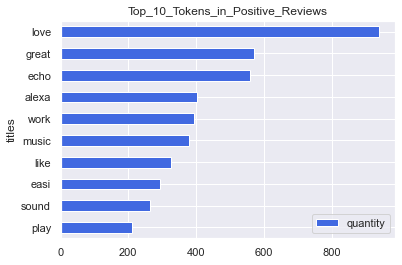

+----+----------+------------+
|    | titles   |   quantity |
|----+----------+------------|
|  9 | love     |        941 |
|  6 | great    |        570 |
|  8 | echo     |        558 |
|  7 | alexa    |        404 |
|  5 | work     |        394 |
|  4 | music    |        379 |
|  3 | like     |        326 |
|  2 | easi     |        293 |
|  1 | sound    |        265 |
|  0 | play     |        212 |
+----+----------+------------+


In [31]:
Top10_OneSet(sample_Positive,"Top_10_Tokens_in_Positive_Reviews","Top_10_Tokens_PR")

### Visualization of top10 tokens only in Negative Reviews

Display top 10 tokens
['would', 'speaker', 'great', 'music', 'like', 'work', 'echo', 'alexa', 'devic', 'sound']


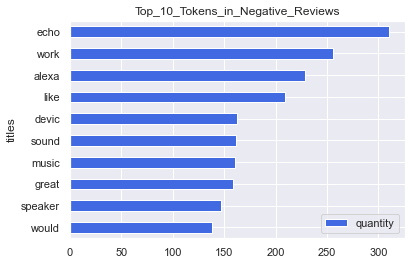

+----+----------+------------+
|    | titles   |   quantity |
|----+----------+------------|
|  6 | echo     |        310 |
|  5 | work     |        256 |
|  7 | alexa    |        229 |
|  4 | like     |        209 |
|  8 | devic    |        163 |
|  9 | sound    |        162 |
|  3 | music    |        161 |
|  2 | great    |        159 |
|  1 | speaker  |        147 |
|  0 | would    |        138 |
+----+----------+------------+


In [32]:
Top10_OneSet(sample_Negative,"Top_10_Tokens_in_Negative_Reviews","Top_10_Tokens_NR")

### Visualization of top10 tokens only in Positive Reviews

Display top 10 tokens


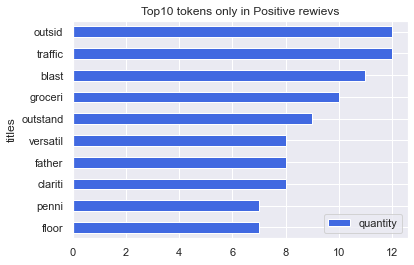

+----+----------+------------+
|    | titles   |   quantity |
|----+----------+------------|
|  7 | traffic  |         12 |
|  8 | outsid   |         12 |
|  9 | blast    |         11 |
|  6 | groceri  |         10 |
|  5 | outstand |          9 |
|  2 | clariti  |          8 |
|  3 | father   |          8 |
|  4 | versatil |          8 |
|  0 | floor    |          7 |
|  1 | penni    |          7 |
+----+----------+------------+


In [33]:
Top10onlyInA(sample_Positive, sample_Negative,"Top10 tokens only in Positive rewievs","Top_10_onlyPR")

### Visualization of top10 tokens only in Negative Reviews

Display top 10 tokens


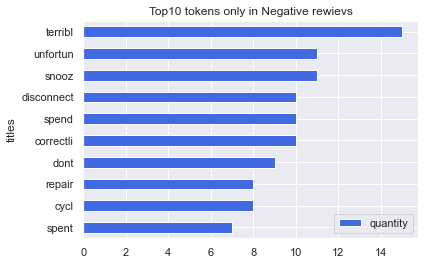

+----+------------+------------+
|    | titles     |   quantity |
|----+------------+------------|
|  8 | terribl    |         15 |
|  5 | snooz      |         11 |
|  9 | unfortun   |         11 |
|  4 | correctli  |         10 |
|  6 | spend      |         10 |
|  7 | disconnect |         10 |
|  2 | dont       |          9 |
|  1 | cycl       |          8 |
|  3 | repair     |          8 |
|  0 | spent      |          7 |
+----+------------+------------+


In [34]:
Top10onlyInA(sample_Negative, sample_Positive,"Top10 tokens only in Negative rewievs","Top_10_onlNR")

### Wordcloud for Positive Reviews

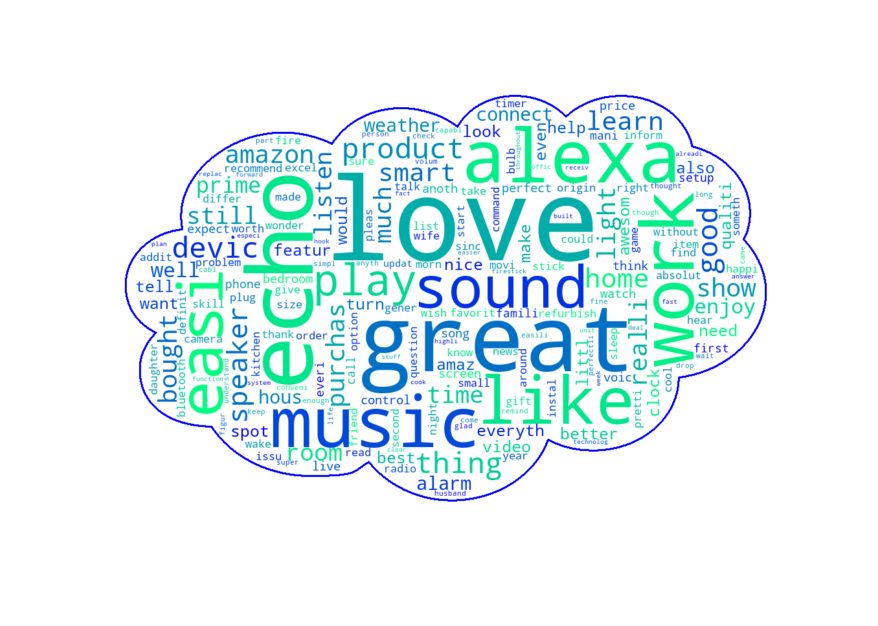

In [35]:
tokens_to_wordcloud = []
for a in sample_Positive:
    tokens_to_wordcloud+=text_tokenizer(a)
bow_txt=create_bow(tokens_to_wordcloud)

mask = np.array(Image.open("mask1.png"))
wordcloud = WordCloud(colormap='winter', background_color="white",mask=mask, contour_width=3, contour_color='blue').generate_from_frequencies(bow_txt)
plt.figure(figsize=(12, 20), facecolor='w')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
#plt.savefig("wordcloud_project.jpg")
plt.show()

### Wordcloud for Negative Reviews

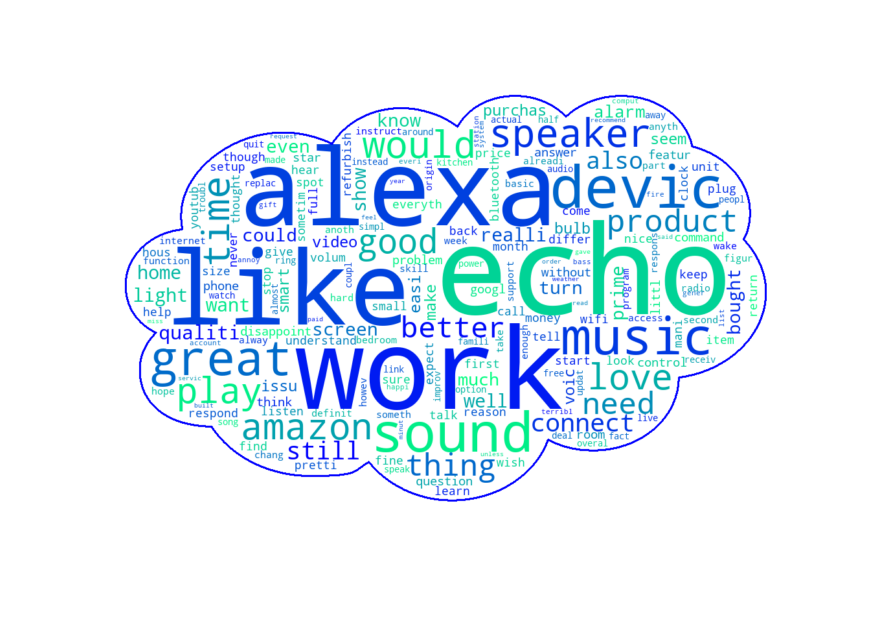

In [36]:
tokens_to_wordcloud = []
for a in sample_Negative:
    tokens_to_wordcloud+=text_tokenizer(a)
bow_txt=create_bow(tokens_to_wordcloud)

mask = np.array(Image.open("mask1.png"))
wordcloud = WordCloud(colormap='winter', background_color="white",mask=mask, contour_width=3, contour_color='blue').generate_from_frequencies(bow_txt)
plt.figure(figsize=(12, 20), facecolor='w')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
#plt.savefig("wordcloud_project.jpg")
plt.show()